In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.drop(['id'],axis=1,inplace=True)

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.loc[((data['bmi'].isna() == True) & (data['gender'] == 'Male')), 'bmi'] = data.loc[data['gender']=='Male']['bmi'].mean()
data.loc[((data['bmi'].isna() == True) & (data['gender'] == 'Female')), 'bmi'] = data.loc[data['gender']=='Female']['bmi'].mean()

In [7]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


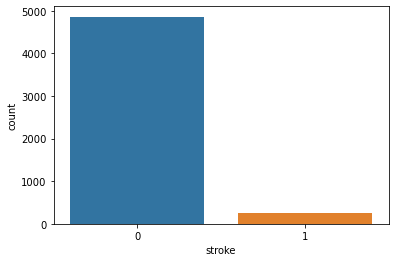

In [8]:
import seaborn as sns
sns.countplot(data['stroke'])

### Before Applying SMOTE on the data, the categorical data has to be converted to numerical features

In [9]:
gender_numerics ={'Male':0, 'Female':1,'Other':2}
married_numerics ={'No':0, 'Yes':1}
work_numerics = {"children":1, "Govt_job":2, "Private":3 ,"Self-employed":4, "Never_worked":5}
residence_numerics ={'Rural':0, 'Urban':1}
smoking_numerics = {"never smoked":0,"formerly smoked":1,"smokes":2, "Unknown":3}

In [10]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
data['gender'] = data['gender'].map(gender_numerics)
data['ever_married'] = data['ever_married'].map(married_numerics)
data['work_type'] = data['work_type'].map(work_numerics)
data['Residence_type'] = data['Residence_type'].map(residence_numerics)
data['smoking_status'] = data['smoking_status'].map(smoking_numerics)

In [12]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.600000,1,1
1,1,61.0,0,0,1,4,0,202.21,29.065758,0,1
2,0,80.0,0,1,1,3,0,105.92,32.500000,0,1
3,1,49.0,0,0,1,3,1,171.23,34.400000,2,1
4,1,79.0,1,0,1,4,0,174.12,24.000000,0,1


In [14]:
data.isnull().sum()
data.to_csv('Sample.csv',index=False)

In [15]:
data['work_type'].isna().value_counts()

False    5110
Name: work_type, dtype: int64

In [16]:
X = data.drop(['stroke'],axis=1)
y = data['stroke']

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, y)

In [18]:
y_smote.shape

(9722,)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.2)

In [21]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2625,0,32.000000,0,0,1,3,1,93.520000,31.900000,3
1850,1,78.000000,0,0,1,4,0,84.490000,26.400000,0
8912,0,75.381542,0,0,1,3,1,105.364806,28.807353,2
9306,1,51.606497,0,0,1,2,1,63.034295,37.458843,0
2016,0,48.000000,1,0,1,4,1,83.340000,49.300000,0


In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
preds = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [26]:
accuracy_score(y_test,preds)

0.9434447300771208

In [27]:
precision_score(y_test,preds)

0.9336734693877551

In [28]:
recall_score(y_test,preds)

0.953125

In [29]:
import pickle
with open('StrokePrediction.pkl', "wb") as f:
    pickle.dump(model, f)